#### Given this dataset with information about games played on the popular website Lichess.org, we will find out: 
* Most used opening in High Elo 

* Most used opening in Low Elo 

* Average turns in High Elo 

* Average turns in Low Elo 

In [120]:
# Improt libraries for data analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv('games.csv')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


##### Most used openings

In [122]:
# 1. What is the most popular opening move in high elo (White)?
white_players_high_elo = df[df['white_rating'] > 1600]['opening_name'].value_counts().nlargest(5)
white_players_high_elo

opening_name
Sicilian Defense                    139
Queen's Pawn Game: Mason Attack     124
French Defense: Knight Variation    113
Sicilian Defense: Bowdler Attack    112
Indian Game                         108
Name: count, dtype: int64

In [123]:
# 1.5. What is the most popular opening move in high elo (Black)?
black_players_high_elo = df[df['black_rating'] > 1600]['opening_name'].value_counts().nlargest(5)
black_players_high_elo

opening_name
Sicilian Defense                    171
Sicilian Defense: Bowdler Attack    131
French Defense: Knight Variation    118
Indian Game                         114
Queen's Pawn Game: Mason Attack     106
Name: count, dtype: int64

In [124]:
# 2. What is the most popular opening move in low elo (White)?
white_players_low_elo = df[df['white_rating'] < 1200]['opening_name'].value_counts().nlargest(5)
white_players_low_elo

opening_name
Van't Kruijs Opening                      96
Scandinavian Defense                      58
King's Pawn Game: Wayward Queen Attack    42
Queen's Pawn Game: Chigorin Variation     32
King's Pawn Game: Leonardis Variation     28
Name: count, dtype: int64

In [125]:
# 2.5. What is the most popular opening move in low elo (Black)?
black_players_low_elo = df[df['black_rating'] < 1200]['opening_name'].value_counts().nlargest(5)
black_players_low_elo

opening_name
Scandinavian Defense                             66
Van't Kruijs Opening                             65
King's Pawn Game: Wayward Queen Attack           34
King's Pawn Game: Leonardis Variation            31
Scandinavian Defense: Mieses-Kotroc Variation    31
Name: count, dtype: int64

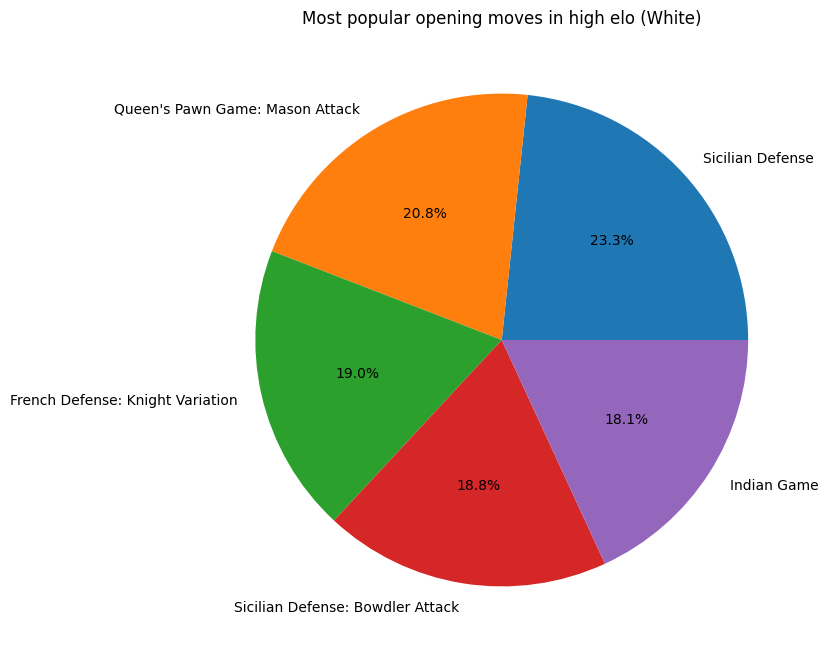

In [126]:
# 3. Visualize the most popular opening moves in High Elo (White)
labels_white_high_elo = white_players_high_elo.index 
plt.figure(figsize=(8, 8))
plt.pie(white_players_high_elo, labels=labels_white_high_elo, autopct='%1.1f%%')
plt.title('Most popular opening moves in high elo (White)')
plt.show()

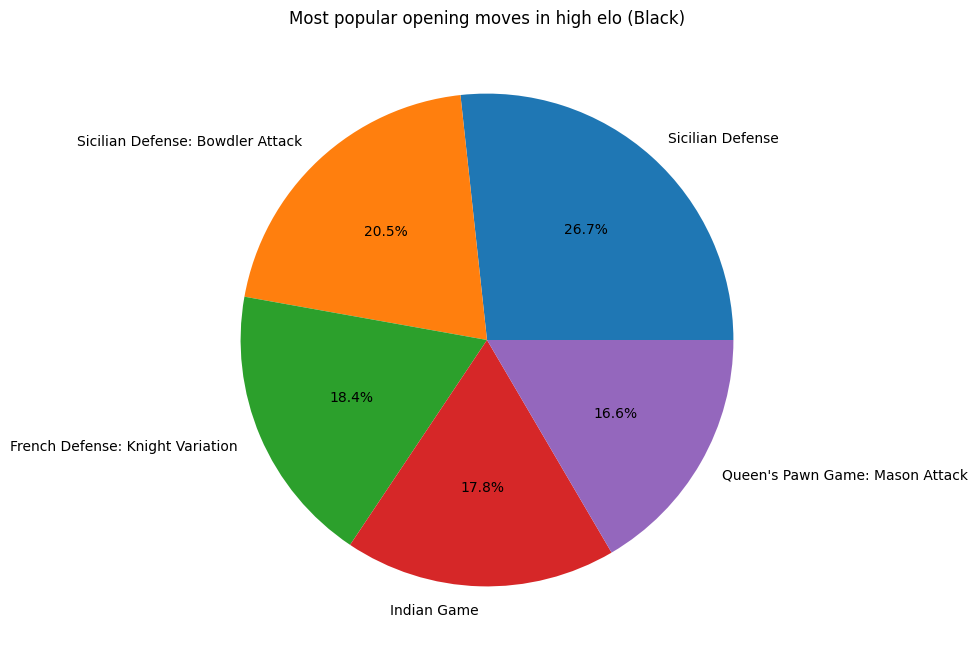

In [127]:
# 3.5. Visualize the most popular opening moves in High Elo (Black)
labels_black_high_elo = black_players_high_elo.index
plt.figure(figsize=(8, 8))
plt.pie(black_players_high_elo, labels=labels_black_high_elo, autopct='%1.1f%%')
plt.title('Most popular opening moves in high elo (Black)')
plt.show()

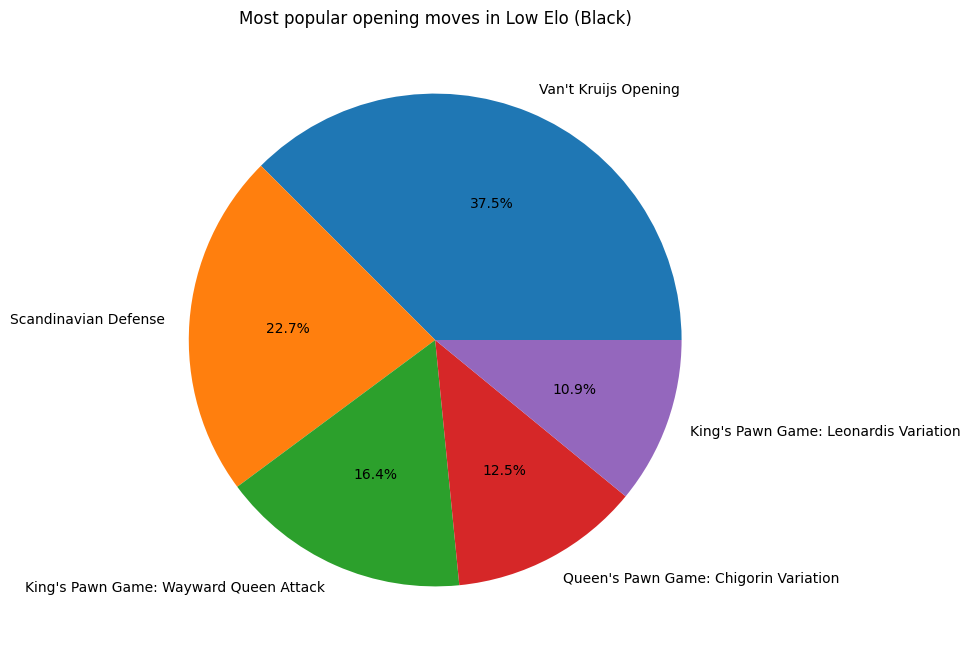

In [128]:
# 3.5. Visualize the most popular opening moves in Low Elo (White)
labels_white_low_elo = white_players_low_elo.index
plt.figure(figsize=(8, 8))
plt.pie(white_players_low_elo, labels=labels_white_low_elo, autopct='%1.1f%%')
plt.title('Most popular opening moves in Low Elo (Black)')
plt.show()

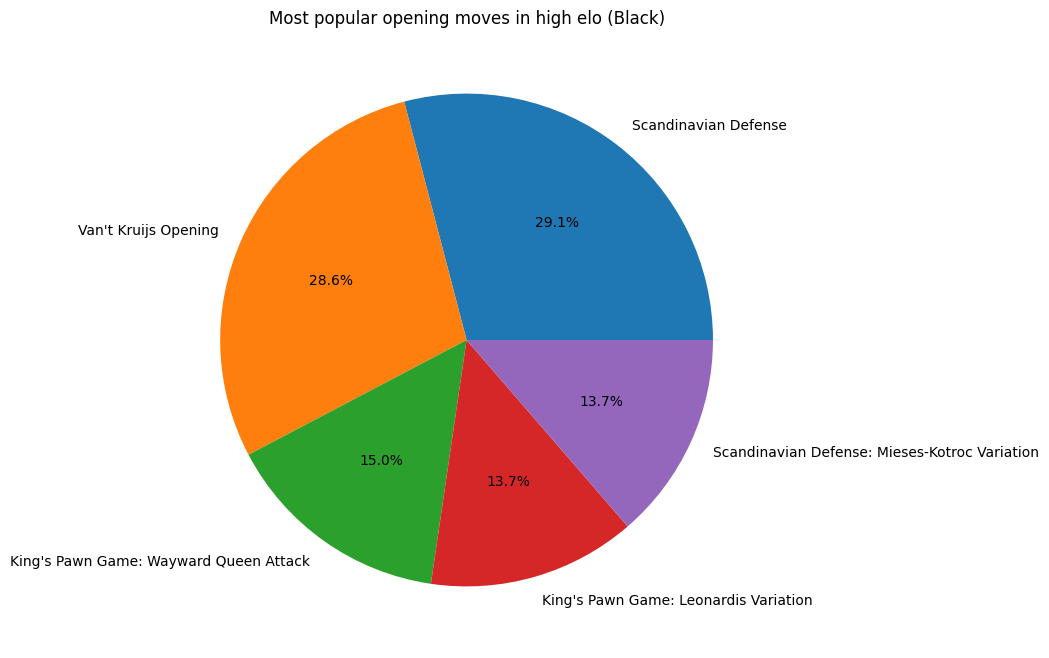

In [129]:
# 3.5. Visualize the most popular opening moves in Low Elo (Black)
labels_black_low_elo = black_players_low_elo.index
plt.figure(figsize=(8, 8))
plt.pie(black_players_low_elo, labels=labels_black_low_elo, autopct='%1.1f%%')
plt.title('Most popular opening moves in high elo (Black)')
plt.show()

##### Avarage turns on a game


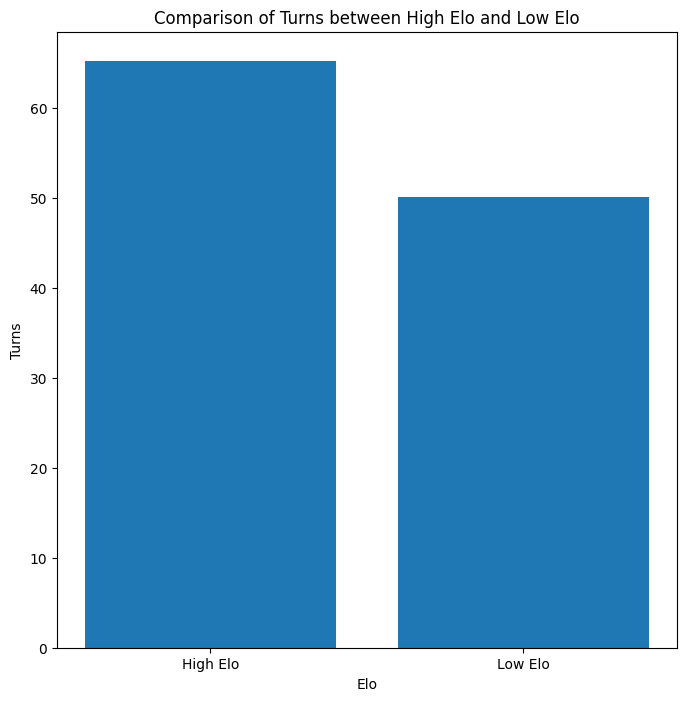

In [131]:
# 4. What is the average number of turns in high elo games?
white_turns_high_elo = df[df['white_rating'] > 1600]['turns'].mean()
black_turns_high_elo = df[df['black_rating'] > 1600]['turns'].mean()
turns_high_elo = (white_turns_high_elo + black_turns_high_elo) / 2


# 4.5. What is the average number of turns in low elo games?
white_turns_low_elo = df[df['white_rating'] < 1200]['turns'].mean()
black_turns_low_elo = df[df['black_rating'] < 1200]['turns'].mean()
turns_low_elo = (white_turns_low_elo + black_turns_low_elo) / 2


labels = ['High Elo', 'Low Elo']
turns = [turns_high_elo, turns_low_elo]

plt.figure(figsize=(8, 8))
plt.bar(labels, turns)
plt.xlabel('Elo')
plt.ylabel('Turns')
plt.title('Comparison of Turns between High Elo and Low Elo')

# Display the chart
plt.show()
